<a href="https://colab.research.google.com/github/gabifc/machine_learning_dell/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Olá, seja bem-vindo!
Durante este curso, você aprendeu sobre “clusterização”, a técnica de
Machine Learning que faz parte do aprendizado não supervisionado, também
conhecida como “análise de agrupamentos”, está lembrado? Então, nesta aula, será
abordado um dos mais renomados algoritmos não hierárquicos na análise de
clusters, o algoritmo K-means. Ficou curioso para saber como funciona? Vamos lá!
Para agrupar dados não rotulados e que possuem características
semelhantes, diversos sistemas utilizam a clusterização. Para realizar essa tarefa,
existem vários algoritmos, sendo um dos mais simples e populares algoritmos de
clustering, o K-means, que você, agora, vai conhecer e entender como funciona.
Inicialmente, vamos falar sobre a definição do K-means. Ele é um algoritmo
não hierárquico, que tem o objetivo de agrupar os dados em k clusters diferentes.
Para entender como o K-means funciona é preciso, primeiro, definir o conceito de
centróide de um cluster.
Um centróide representa o centro de um cluster e é obtido pelo valor médio
dos dados que estão dentro desse cluster. Assim, o algoritmo K-means encontra,
iterativamente, o centróide de cada cluster através de uma medida de distância, de forma que cada cluster contenha os dados, cuja distância entre eles e o centróide
seja mínima. O algoritmo K-means pode ser representado pelas seguintes etapas:
1 - Divida os dados em k grupos com centróides criadas aleatoriamente
2 - repita até que a condição seja satisfeita:
3 - | calcule a distância de cada objeto ao centróide
|
4 - | atribuir o objeto para o grupo com menor distância ao centróide
|
5 - | atualize o centróide de cada grupo

Graficamente, as etapas podem ser expressas da seguinte forma: Os passos
do algoritmo K-means estão ligados por setas e cada passo é ilustrado por três
grupos de círculos, representando os dados, com um símbolo de + colorido.
No primeiro passo, o da “Inicialização de meio”, o grupo à esquerda tem um
símbolo de + azul, o da direita tem um símbolo de + em vermelho e o de cima tem
um símbolo de + verde. Todos os grupos são da cor cinza.
No segundo passo, o da “Atribuição de grupo”, os grupos agora estão
coloridos e estão divididos por três linhas. À esquerda, sobre um fundo azul, há o
grupo azul com o + azul. À direita, sobre um fundo vermelho, existe o grupo
vermelho com o + vermelho. Em cima, sobre um fundo verde, encontra-se o grupo
verde com o + verde. Alguns círculos de um grupo cruzam parcialmente a linha do
outro grupo.
No terceiro passo, o da “Atualização de meio”, as linhas e os fundos
sumiram, mas os grupos ainda mantêm a mesma posição do passo 2, com alguns círculos de um grupo próximo de outro. Sobre esse passo, há um símbolo de
atualização.
No quarto passo, o da “Convergência”, os grupos estão claramente
separados entre si, sem nenhum círculo de um grupo se aproximando de outro.  
O algoritmo realizará esses passos até que uma condição de parada seja
satisfeita. Essa condição de parada é conhecida como convergência, e pode ser
representada, por exemplo, pela soma do erro quadrático, do inglês SSE (Sum of
Squared Errors). Ele representa a soma das diferenças ao quadrado, entre cada
observação e a média do grupo em um conjunto de dados.  
Na literatura, um dos métodos mais populares de encontrar o valor de k é o
método Elbow, que consiste em plotar a variância dos dados em função do número
de clusters. Desse modo, a partir do ponto em que os valores de k crescem e os
valores de variância não mudam de forma significativa, esse ponto é o melhor valor
para k.
Sendo assim, o método Elbow, também conhecido como método do
cotovelo, cujo apelido se deve, além da tradução literal de Elbow ser “cotovelo”, à
curva formada por ele também lembra o formato de um cotovelo.
A representação gráfica desse método é formada por dois eixos. O eixo Y, na
vertical, representa a variância. O eixo X, na horizontal, representa o número de
clusters. Ao lado, há a letra k. No gráfico, existe uma linha com vários pontos
vermelhos que se assemelha a um cotovelo. No quarto ponto, na “dobra” do
cotovelo, encontra-se uma seta com a mensagem “Valor de k pelo método Elbow”.  
Agora, de forma prática, no ambiente do jupyter, você vai aplicar o algoritmo
K-means, usando a biblioteca scikit-learn em um conjunto de dados, tudo bem?  
Para isso, utilize uma base de dados criada para fins didáticos, que
representa informações básicas dos clientes de um shopping. Depois, use o
algoritmo K-means para identificar possíveis grupos de clientes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Leitura dos dados
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#tamanho do dataframe - quantidade de registros
df.shape

(200, 5)

In [5]:
# verificar dados nulos - retorna a soma dos dados nulos na tabela
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# informações estatísticas
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


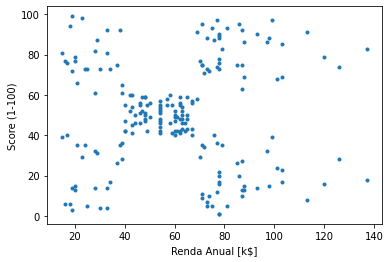

In [7]:
# gerando gráfico de renda anual versus score do cliente
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], marker='.')
plt.xlabel('Renda Anual [k$]')
plt.ylabel('Score (1-100)')
plt.show()

In [9]:
# selecionando dados para o agrupamento
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
# Importando K-means
from sklearn.cluster import KMeans

In [11]:
# clusterizando com k = 5
modelo_kmeans = KMeans(n_clusters= 5, init='k-means++')

In [12]:
y_kmeans= modelo_kmeans.fit_predict(X)

In [13]:
print(y_kmeans)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [14]:
# visualizando o primeiro grupo criado
print(X[y_kmeans == 0])

     Annual Income (k$)  Spending Score (1-100)
43                   39                      61
46                   40                      55
47                   40                      47
48                   40                      42
49                   40                      42
..                  ...                     ...
121                  67                      40
122                  69                      58
126                  71                      35
132                  72                      34
142                  76                      40

[81 rows x 2 columns]


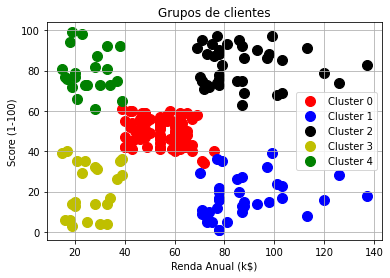

In [17]:
# visualizando todos os grupos com loop
k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']
for k in range(k_grupos):
    cluster = X[y_kmeans == k]
    plt.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'],
                s = 100, c = cores[k], label = f'Cluster {k}')
    
plt.title('Grupos de clientes')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score (1-100)')
plt.grid()
plt.legend()
plt.show()